In [1]:
#Import Neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#Loading the dataset using pandas read_csv 
df = pd.read_csv('concrete_data.csv')
df.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


The dataset contains 1030 observations accross 8 input variables and an output variable. The variable name, variable type, the measurement unit and a brief description is provided.

* Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

* Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

* Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

* Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

* Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

* Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input

* Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

* Age -- quantitative -- Day (1~365) -- Input Variable

* Concrete compressive strength -- quantitative -- MPa -- Output Variable|

### Data Exploration and Data Cleaning

In [3]:
df.shape
# We have 1030 Rows and 9 columns 

(1030, 9)

In [4]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [5]:
df.describe

<bound method NDFrame.describe of       Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  Strength  
0               1040.0           676.0   28     79.99  
1            

In [6]:
#Lets check if there is any null or missing values 
df.isnull().values.any()

False

In [7]:
X=df.iloc[:,0:].values
Y=df.iloc[:,-1].values

#### BoxPlot

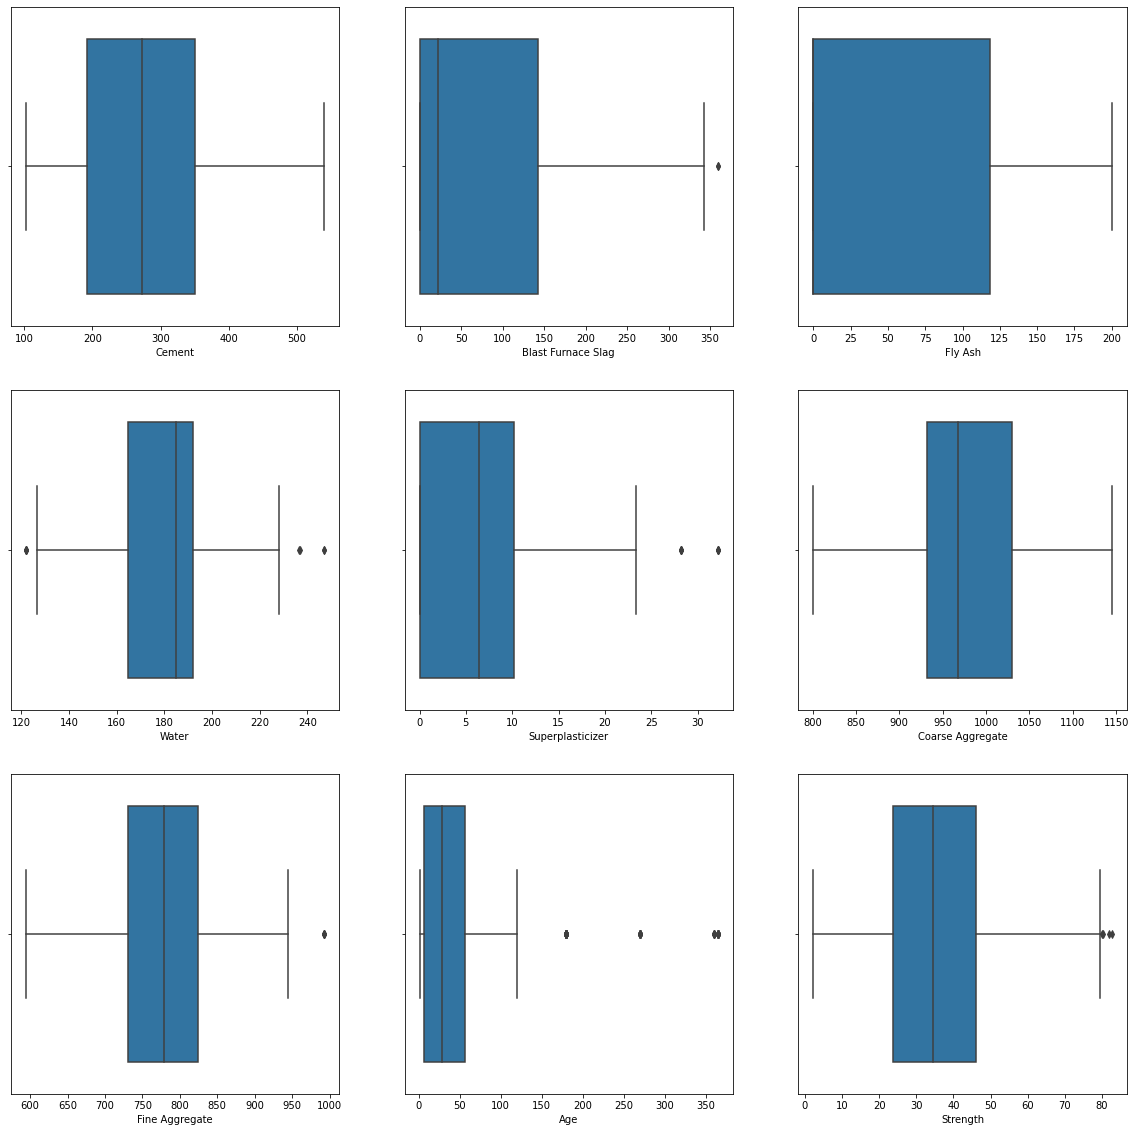

In [8]:
fig, axes = plt.subplots(3, 3, figsize = (20,20));
col_cnt = 0
col_names = df.columns.tolist()
for r in range(3):
    for c in range(3):
            sns.boxplot(df[col_names[col_cnt]], ax=axes[r][c], orient="h");
            col_cnt += 1

#### Scatterplot

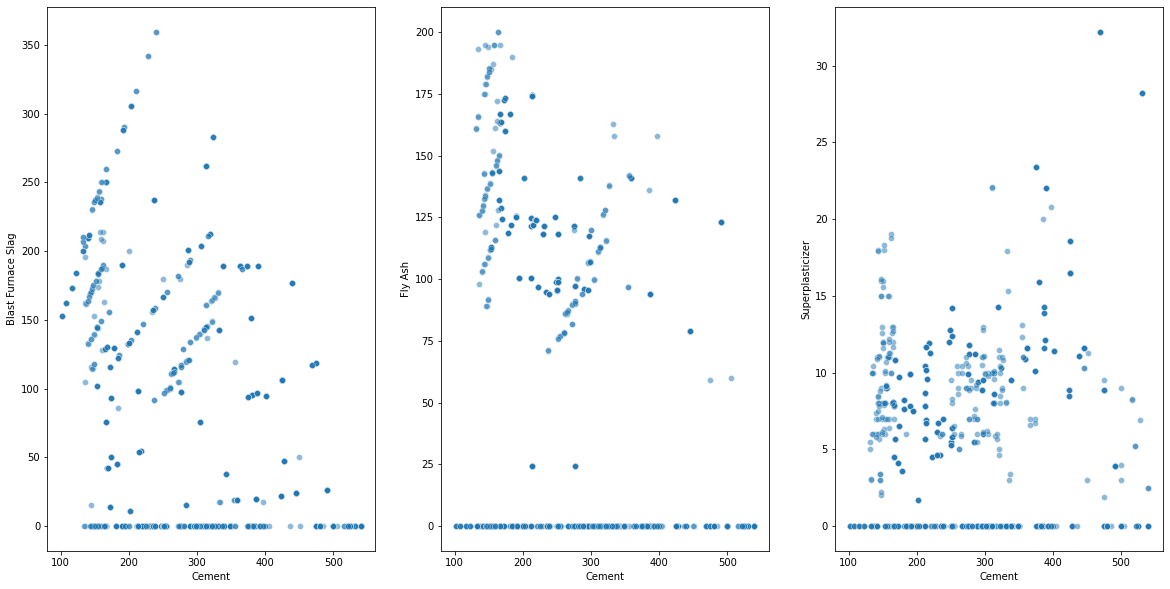

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (20,10));

sns.scatterplot(y="Blast Furnace Slag", x="Cement", data=df, ax=axes[0], alpha=0.5);
sns.scatterplot(y="Fly Ash", x="Cement", data=df, ax=axes[1], alpha=0.5);
sns.scatterplot(y="Superplasticizer", x="Cement", data=df, ax=axes[2], alpha=0.5);

####  scatter matrix

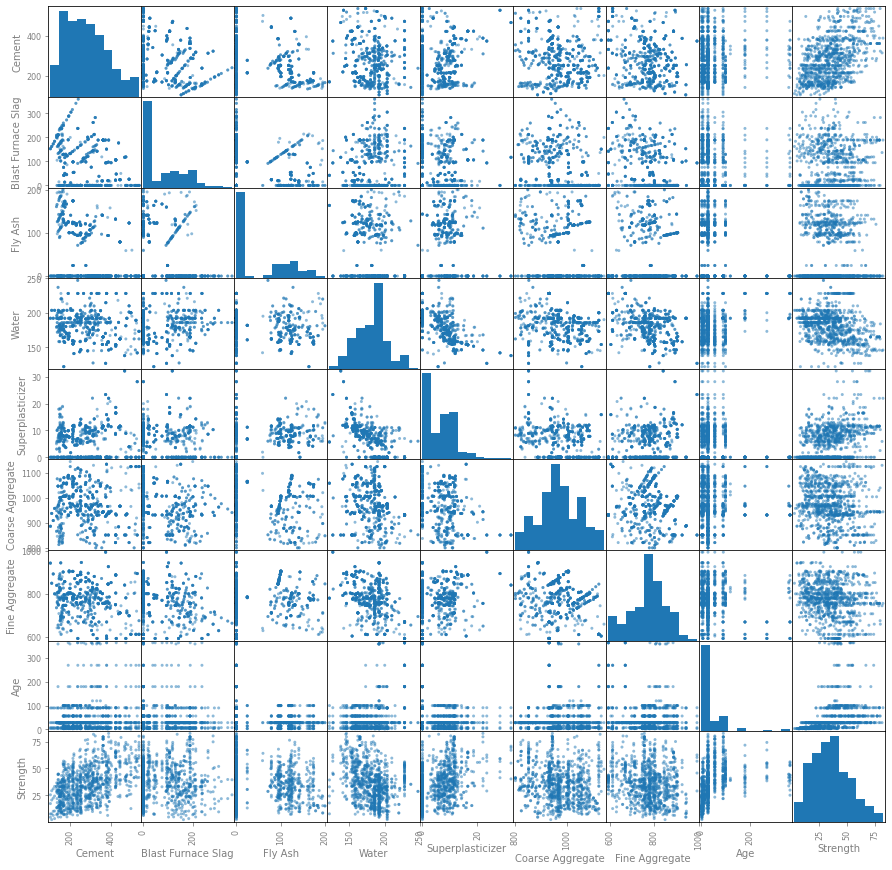

In [10]:
axs = pd.plotting.scatter_matrix(df, figsize=(15, 15))
for ax in axs[:,0]: # the left boundary
    ax.tick_params(axis='x', colors='gray')
    ax.tick_params(axis='y', colors='gray')
    ax.xaxis.label.set_color('gray')
    ax.yaxis.label.set_color('gray')
for ax in axs[-1,:]: # the lower boundary
    ax.tick_params(axis='x', colors='gray')
    ax.tick_params(axis='y', colors='gray')
    ax.xaxis.label.set_color('gray')
    ax.yaxis.label.set_color('gray')
plt.show();


#### Heatmap

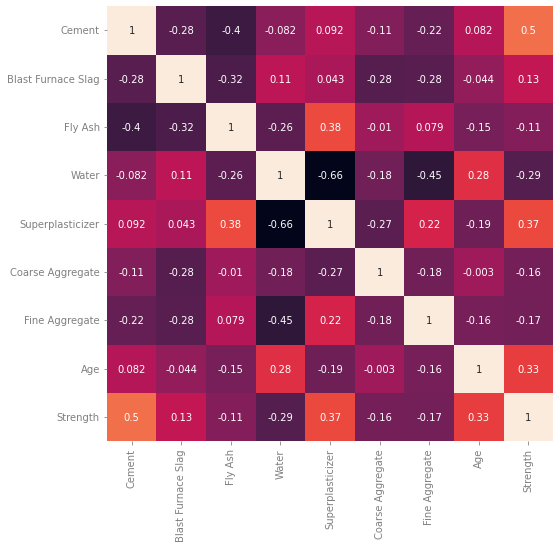

In [11]:
plt.subplots(figsize=(8,8))
ax = sns.heatmap(df.corr(), annot=True, cbar=False);
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

### We have to split the dataset for training and testing

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15)

### The data is now ready to be trained so lets train it first with Random Forest 

In [13]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state = 1,n_estimators = 500,max_depth = 5,min_samples_split = 5,min_samples_leaf = 1)


In [14]:
# Training our model
model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=500,
                      random_state=1)

In [15]:
# Predicting on our test dataset
my_pred=model.predict(X_test)

### Validating our model

In [16]:
from sklearn.metrics import r2_score
r2_score(Y_test,my_pred)

0.9995283493185663

Thus we have obtained a model with an accuracy of 0.99